In [166]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [167]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [168]:
#plot
def plotImages(images):
    canais = ['Original', 'Canal R', 'Canal G', 'Canal B']
    _, ax = plt.subplots(1, len(images), figsize=(3 * len(images), 3))
    for i in range(len(images)):
        if(i == 0):
            ax[i].set_title(canais[i])
            ax[i].imshow(images[i])
        else:
            ax[i].set_title(str(canais[i]))
            ax[i].imshow(images[i],cmap='gray')
    plt.show()

In [169]:
#bgr -> hsi
def BGR2HSI(img):
    with np.errstate(divide='ignore', invalid='ignore'):

        bgr = np.float32(img)/255

        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        hsi = cv.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

In [170]:
#bgr -> cmy
def BGR2CMYK(img):
    img = img.astype(np.float64)/255.
    K = 1 - np.max(img, axis=2)
    C = (1-img[...,2] - K)/(1-K)
    M = (1-img[...,1] - K)/(1-K)
    Y = (1-img[...,0] - K)/(1-K)

    cmyk = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
    return cmyk

In [171]:
baboon = cv.imread("baboon.png")
cube = cv.imread("rgbcube_kBKG.png")
rgb = cv.imread("rgb.png")
images = np.array([baboon,cube,rgb], dtype=object)

### BGR $\rightarrow$ RGB

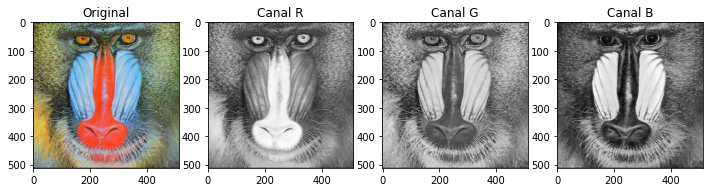

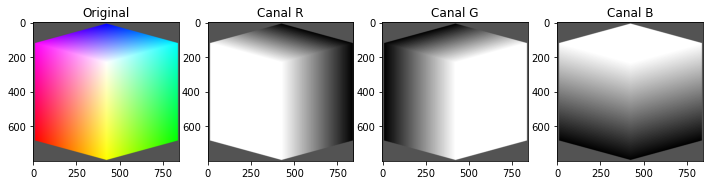

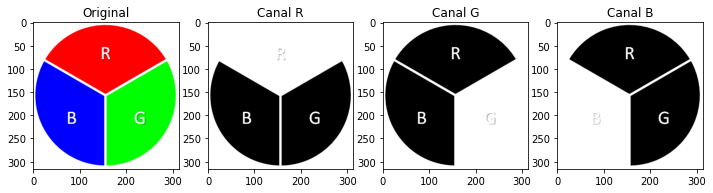

In [172]:
def RGB(img): 
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    rgb = cv.split(img)
    images = [img, rgb[0], rgb[1],rgb[2]]
    plotImages(images)
for i in images:
    RGB(i)

### BGR $\rightarrow$ NTSC

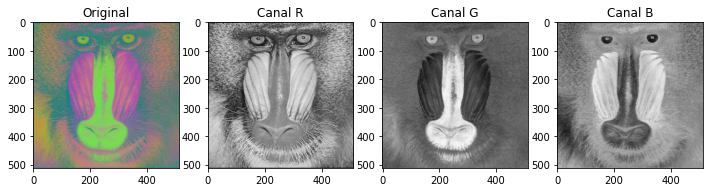

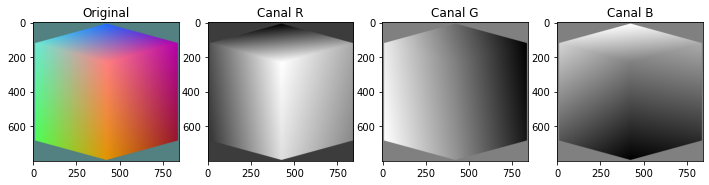

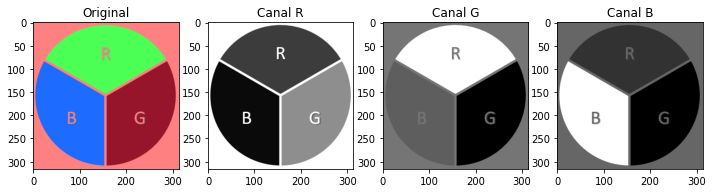

In [173]:
def YCrCB(img): 
    img = cv.cvtColor(img,cv.COLOR_BGR2YCrCb)
    ycrcb = cv.split(img)
    images = [img, ycrcb[0], ycrcb[1],ycrcb[2]]
    plotImages(images)
for i in images:
    YCrCB(i)

### BGR $\rightarrow$ HSV

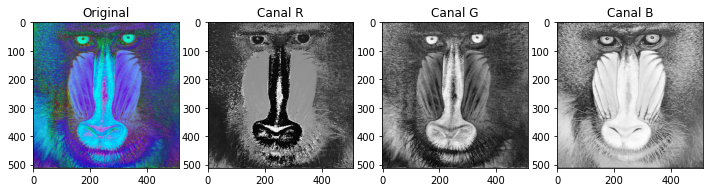

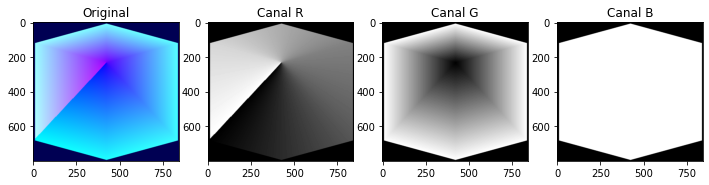

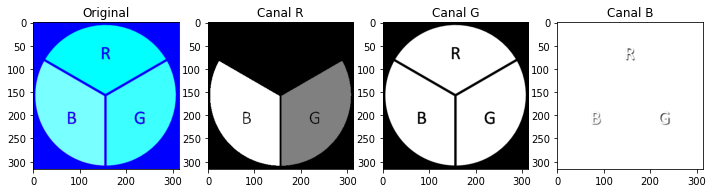

In [174]:
def HSV(img): 
    img = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    hsv = cv.split(img)
    images = [img, hsv[0], hsv[1],hsv[2]]
    plotImages(images)
for i in images:
    HSV(i)

### BGR $\rightarrow$ HSI

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


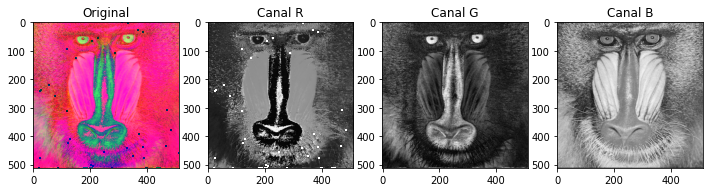

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


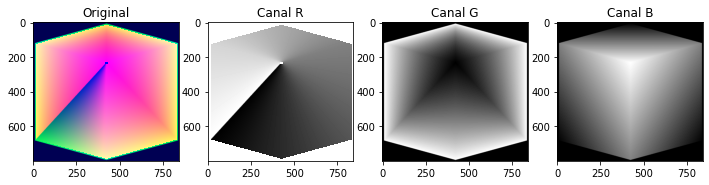

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


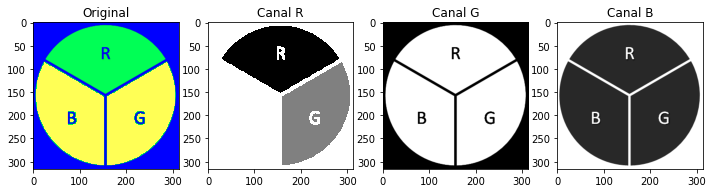

In [175]:
def HSI(img): 
    img = BGR2HSI(img)
    hsi = cv.split(img)
    images = [img, hsi[0], hsi[1],hsi[2]]
    plotImages(images)
for i in images:
    HSI(i)

### BGR $\rightarrow$ LAB

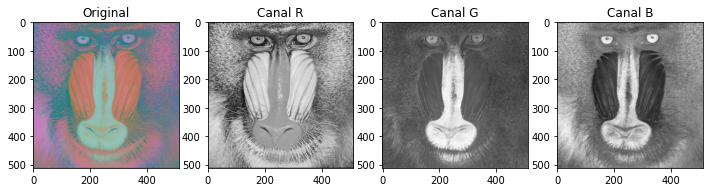

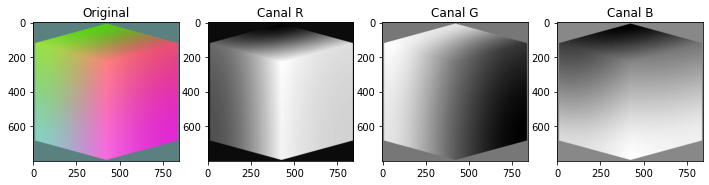

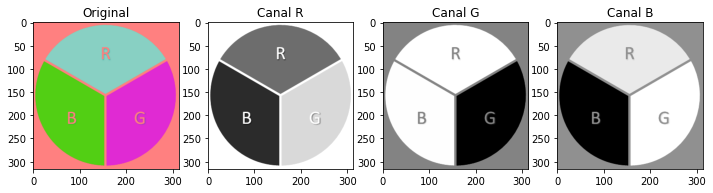

In [176]:
def LAB(img): 
    img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
    lab = cv.split(img)
    images = [img, lab[0], lab[1],lab[2]]
    plotImages(images)
for i in images:
    LAB(i)

### BGR $\rightarrow$ CIE XYZ

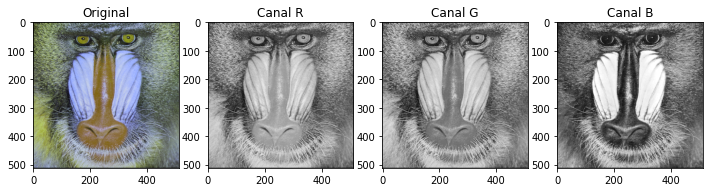

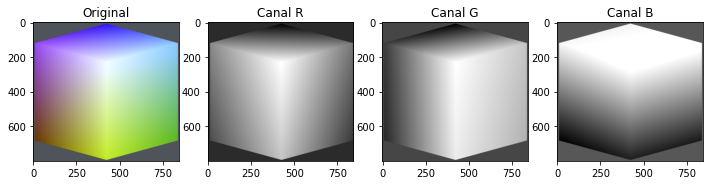

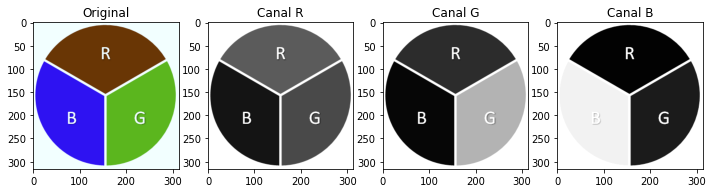

In [177]:
def XYZ(img): 
    img = cv.cvtColor(img, cv.COLOR_BGR2XYZ)
    xyz = cv.split(img)
    images = [img, xyz[0], xyz[1], xyz[2]]
    plotImages(images)
for i in images:
    XYZ(i)

### BGR $\rightarrow$ CMYK

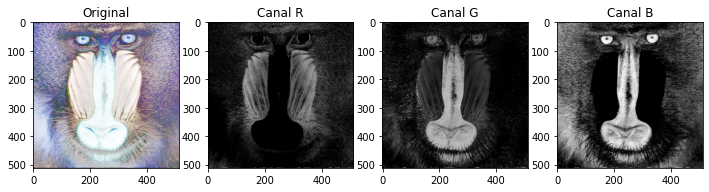

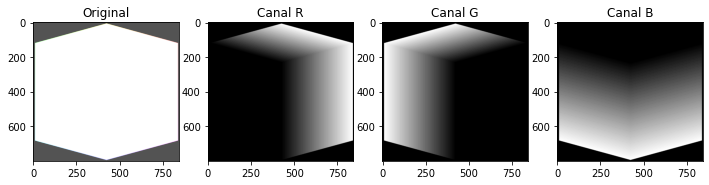

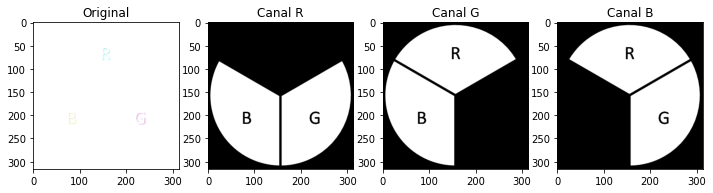

In [178]:
def CMYK(img): 
    img = BGR2CMYK(img)
    cmyk = cv.split(img)
    images = [img, cmyk[0], cmyk[1], cmyk[2]]
    plotImages(images)
for i in images:
    CMYK(i)